In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
!pip install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [100]:
# Load datasets
features_path = "Features data set.csv"
sales_path = "sales data-set.csv"
stores_path = "stores data-set.csv"

# Read CSV files into DataFrames
features_df = pd.read_csv(features_path)
sales_df = pd.read_csv(sales_path)
stores_df = pd.read_csv(stores_path)

print("Displaying the first five rows of the Features DataFrame:")
display(features_df.head())

print("Displaying the first five rows of the Sales DataFrame:")
display(sales_df.head())

print("Displaying the first five rows of the Stores DataFrame:")
display(stores_df.head())


Displaying the first five rows of the Features DataFrame:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Displaying the first five rows of the Sales DataFrame:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


Displaying the first five rows of the Stores DataFrame:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [101]:
# Merge 'stores' and 'sales' datasets on 'Store'
merged_df = pd.merge(sales_df, stores_df, on="Store", how="left")

# Merge the resulting DataFrame with the 'features' dataset on 'Store' and 'Date'
final_df = pd.merge(merged_df, features_df, on=["Store", "Date"], how="left")

print("Displaying the first five rows of the resulting DataFrame:")
final_df.head()

Displaying the first five rows of the resulting DataFrame:


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [102]:
# Check for missing data
print("Missing/Null Data Status:")
missing_data = final_df.isnull().sum()
missing_data[missing_data > 0]

Missing/Null Data Status:


MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64

In [103]:
# Fill missing values in Markdown columns with 0
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
final_df[markdown_columns] = final_df[markdown_columns].fillna(0)

# Combine IsHoliday_x and IsHoliday_y columns into a single IsHoliday column
final_df['IsHoliday'] = final_df['IsHoliday_x'] | final_df['IsHoliday_y']
final_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)

# Display the first five rows of the final DataFrame and some basic statistics
print("Displaying the first five rows of the final DataFrame:")
display(final_df.head())

print("\nBasic Statistics:")
display(final_df.describe())

Displaying the first five rows of the final DataFrame:


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,05/02/2010,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False



Basic Statistics:


,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


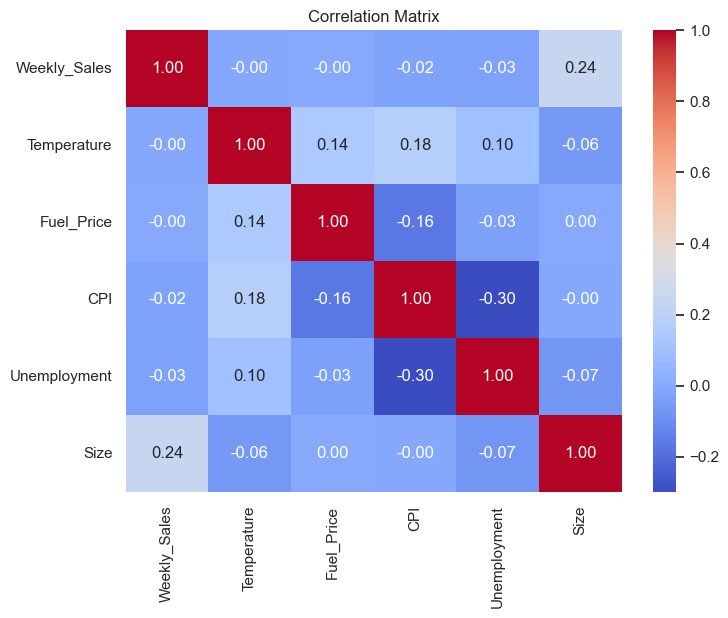

In [104]:
# Correlation Analysis
correlation_matrix = final_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

html = """
<h3>Correlation Matrix Analysis</h3>
<p>Based on the correlation matrix, the most significant relationships regarding weekly sales can be summarized as follows:</p>
<ul>
    <li><strong>Store Size (Size):</strong> There is a correlation of 0.24 between Weekly Sales and Size. This generally indicates that as the size of the store increases, weekly sales also tend to increase. The size of the store can offer a wider range of products and attract more customers, which directly contributes to the sales volume.</li>
    <li><strong>Other Economic and Environmental Variables:</strong> The relationships between weekly sales and other variables such as temperature, fuel prices, Consumer Price Index (CPI), and unemployment rate are quite weak. This shows that weekly sales largely move independently of these factors. This situation indicates that these variables do not have a direct significant impact on weekly sales.</li>
</ul>
"""
display(HTML(html))

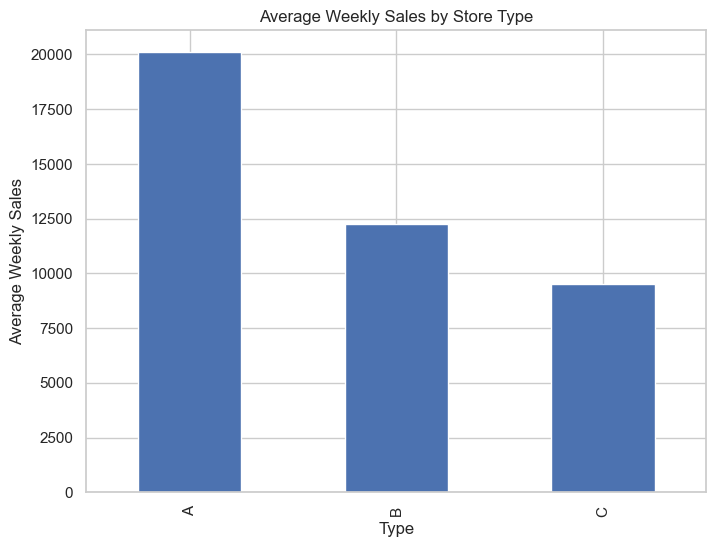

In [105]:
# Sales Analysis by Store Type
plt.figure(figsize=(8, 6))
final_df.groupby('Type')['Weekly_Sales'].mean().plot(kind='bar')
plt.title('Average Weekly Sales by Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

html = """
<h3>Store Type Impact on Sales</h3>
<p>As depicted in the graph, the type of store significantly influences weekly sales volumes. Type A stores have the highest average weekly sales, while Type C stores show the lowest. This demonstrates that store type plays a decisive role in sales performance.</p>
"""
display(HTML(html))

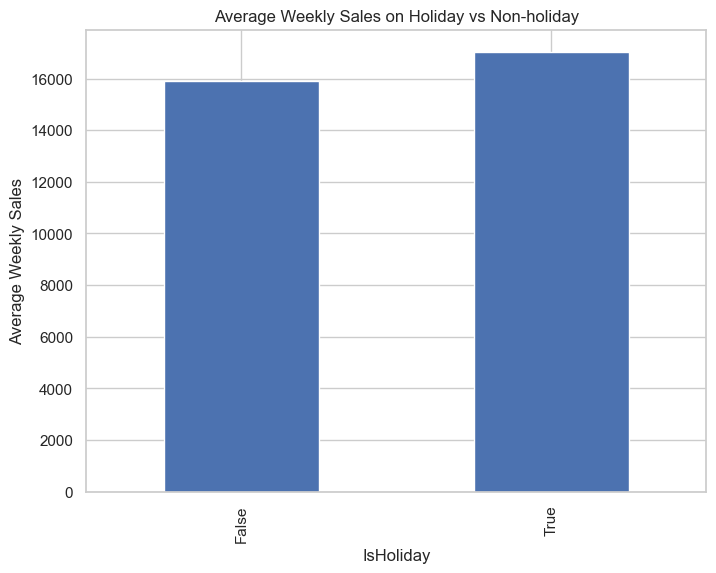

In [106]:
# Holiday Effect
plt.figure(figsize=(8, 6))
final_df.groupby('IsHoliday')['Weekly_Sales'].mean().plot(kind='bar')
plt.title('Average Weekly Sales on Holiday vs Non-holiday')
plt.ylabel('Average Weekly Sales')
plt.show()

html = """
<h3>Weekly Sales Analysis: Holiday vs Non-Holiday</h3>
<p>As observed in the graph, there is a slight difference between weekly sales on holidays and non-holidays. Sales on holidays are modestly higher compared to non-holiday periods. However, this difference is not particularly significant.</p>
"""
display(HTML(html))

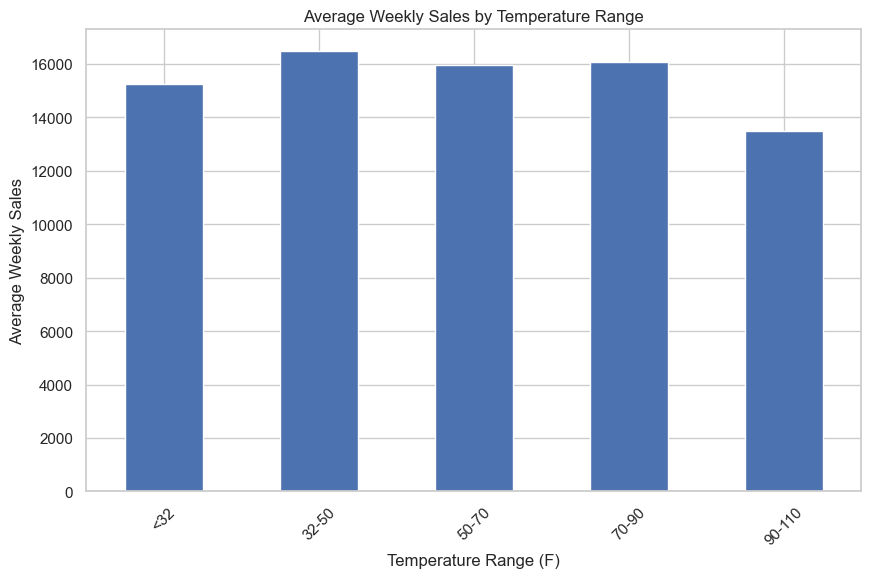

In [107]:
# Grouping by temperature ranges and calculating average sales
temperature_bins = [0, 32, 50, 70, 90, 110]  # Temperature ranges in Fahrenheit
final_df['Temp_Range'] = pd.cut(final_df['Temperature'], bins=temperature_bins, labels=["<32", "32-50", "50-70", "70-90", "90-110"])
average_sales_by_temp = final_df.groupby('Temp_Range', observed=True)['Weekly_Sales'].mean()

# Visualization
plt.figure(figsize=(10, 6))
average_sales_by_temp.plot(kind='bar')
plt.title('Average Weekly Sales by Temperature Range')
plt.xlabel('Temperature Range (F)')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.show()

html = """
<h3>Weekly Sales Analysis by Temperature Range</h3>
<p>The chart displays average weekly sales across different temperature ranges, revealing distinct patterns:</p>
<ul>
    <li><strong>Low Temperature Ranges (<=32°F and 32-50°F):</strong> In these ranges, weekly sales appear to be relatively high.</li>
    <li><strong>Moderate Temperature Ranges (50-70°F and 70-90°F):</strong> In these temperature ranges, sales continue to be at a relatively high level.</li>
    <li><strong>High Temperature Range (90-110°F):</strong> In this range, average weekly sales have significantly decreased.</li>
</ul>
<p>This analysis suggests that temperature ranges significantly impact retail sales.</p>
"""
display(HTML(html))

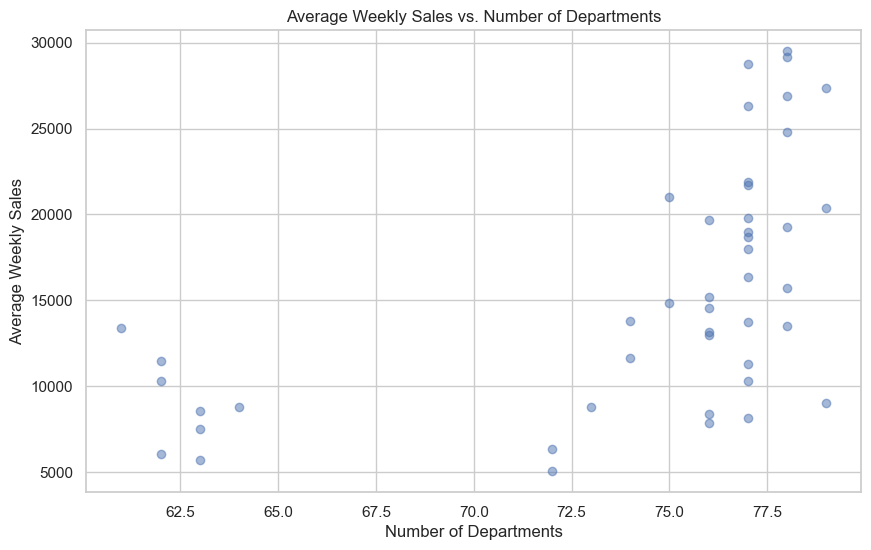

Correlation between number of departments and average weekly sales: 0.5494141942368527


In [108]:
# Calculate the number of unique departments for each store
departments_per_store = final_df.groupby('Store')['Dept'].nunique()

# Calculate the average weekly sales for each store
average_sales_per_store = final_df.groupby('Store')['Weekly_Sales'].mean()

# Combine the number of departments and average sales into a DataFrame
store_performance = pd.DataFrame({
    'Average_Sales': average_sales_per_store,
    'Num_Departments': departments_per_store
})

# Visualization with scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(store_performance['Num_Departments'], store_performance['Average_Sales'], alpha=0.5)
plt.title('Average Weekly Sales vs. Number of Departments')
plt.xlabel('Number of Departments')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = store_performance['Num_Departments'].corr(store_performance['Average_Sales'])
print("Correlation between number of departments and average weekly sales:", correlation)

html = """
<h3>Average Weekly Sales vs. Number of Departments</h3>
<p>The chart illustrates the relationship between the number of departments in a store and its average weekly sales. Observations include:</p>
<ul>
    <li><strong>Moderate Correlation:</strong> There is a moderate positive correlation of 0.549 between the number of departments and average weekly sales, suggesting that generally, an increase in the number of departments tends to be associated with higher weekly sales.</li>
    <li><strong>Distribution and Trend:</strong> The graph shows that stores with department numbers ranging from 70 to 77.5 tend to have higher average weekly sales. While the trend indicates that sales generally increase with more departments, some stores do not strictly follow this trend.</li>
</ul>
"""
display(HTML(html))

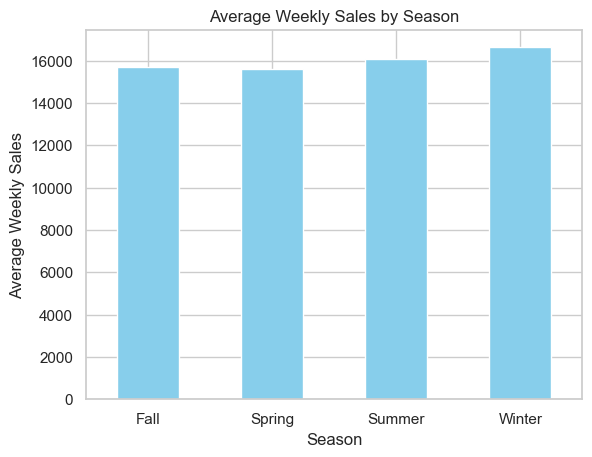

In [115]:
# Convert the Date column to datetime with the correct format
final_df['Date'] = pd.to_datetime(final_df['Date'], format="%d/%m/%Y")

# Classify into seasons
conditions = [
    (final_df['Date'].dt.month.isin([3, 4, 5])),
    (final_df['Date'].dt.month.isin([6, 7, 8])),
    (final_df['Date'].dt.month.isin([9, 10, 11])),
    (final_df['Date'].dt.month.isin([12, 1, 2]))
]

choices = ['Spring', 'Summer', 'Fall', 'Winter']
final_df['Season'] = np.select(conditions, choices)

# Calculate average weekly sales for each season
seasonal_sales = final_df.groupby('Season')['Weekly_Sales'].mean()

# Visualization
seasonal_sales.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

html = """
<h3>Seasonal Analysis of Weekly Sales</h3>
<p>As seen in the graph, average weekly sales throughout the four seasons demonstrate distinct seasonality. Spring and fall seasons generally show similar and relatively high sales levels. In contrast, summer and winter months stand out with higher sales, reflecting increased consumer activity during these periods.</p>
<p>This analysis indicates that seasonality significantly influences weekly sales, particularly showing an increase during summer and winter months.</p>
"""
display(HTML(html))

In [116]:
# Calculate the number of unique departments for each store
departments_per_store = final_df.groupby('Store')['Dept'].nunique()
departments_per_store = departments_per_store.rename('Num_Departments')

# Add the number of departments to the final_df dataset
final_df = final_df.merge(departments_per_store, on='Store', how='left')

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data loading and preprocessing
data = final_df.copy()
data['IsHoliday'] = data['IsHoliday'].astype(int)  # Convert holidays to integer

# One-hot encode the Type and Season columns
data = pd.get_dummies(data, columns=['Type', 'Season'])

# Features and target variable
X = data[['Size', 'Type_A', 'Type_B', 'Type_C', 'IsHoliday', 'Temperature', 'Dept', 'Num_Departments', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'CPI', 'Unemployment']]
y = data['Weekly_Sales']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Performance evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate average weekly sales
average_weekly_sales = final_df['Weekly_Sales'].mean()
print(f"Average Weekly Sales: {average_weekly_sales}")

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Average Weekly Sales: 15981.25812346704
Mean Absolute Error: 4823.135227275253
Root Mean Squared Error: 8858.872078454096


In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data loading and preprocessing
data = final_df.copy()
data['IsHoliday'] = data['IsHoliday'].astype(int)  # Convert holidays to integer

# One-hot encode the Type and Season columns
data = pd.get_dummies(data, columns=['Type', 'Season'])

# Features and target variable
X = data[['Size', 'Type_A', 'Type_B', 'Type_C', 'IsHoliday', 'Temperature', 'Dept', 'Num_Departments', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'CPI', 'Unemployment']]
y = data['Weekly_Sales']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Performance evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate average weekly sales
average_weekly_sales = final_df['Weekly_Sales'].mean()
print(f"Average Weekly Sales: {average_weekly_sales}")

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Average Weekly Sales: 15981.25812346704
Mean Absolute Error: 1877.2812322520579
Root Mean Squared Error: 5214.445001136505


In [119]:
html = """
<h3>Model Evaluation and Recommendations</h3>

<h4>Model 1: XGBoost Regressor</h4>
<ul>
    <li><strong>Average Weekly Sales:</strong> 15981.25812346704</li>
    <li><strong>Mean Absolute Error (MAE):</strong> 4823.135227275253</li>
    <li><strong>Root Mean Squared Error (RMSE):</strong> 8858.872078454096</li>
</ul>

<h4>Model 2: RandomForest Regressor</h4>
<ul>
    <li><strong>Average Weekly Sales:</strong> 15981.25812346704</li>
    <li><strong>Mean Absolute Error (MAE):</strong> 1877.2812325204579</li>
    <li><strong>Root Mean Squared Error (RMSE):</strong> 5214.445001136505</li>
</ul>

<h4>Analysis and Recommendations</h4>
<p><strong>Performance Comparison:</strong></p>
<ul>
    <li><strong>MAE:</strong> MAE indicates how much the predicted weekly sales deviate on average from the actual weekly sales. The MAE for the XGBoost model is 4823, whereas for the RandomForest model it is 1877. This shows that the RandomForest model makes less error in weekly sales predictions compared to the XGBoost model.</li>
    <li><strong>RMSE:</strong> RMSE is the square root of the average of squared errors, giving more weight to larger errors. The RMSE for the XGBoost model is 8858, while for the RandomForest model it is 5214. This also indicates better performance of the RandomForest model, especially in terms of larger errors.</li>
</ul>

<p><strong>Store Managers' Utilization:</strong></p>
<ul>
    <li><strong>Sales Prediction:</strong> The lower error rates of the RandomForest model enable store managers to predict weekly sales more accurately. This accuracy is critical for inventory management, supply chain optimization, and sales strategy determination.</li>
    <li><strong>Trend Analysis:</strong> Both models consider the effects of various variables such as seasonality, store type, and temperature on sales. Store managers can use these models to better understand sales trends and fluctuations during specific periods.</li>
    <li><strong>Resource Allocation:</strong> More accurate sales predictions allow store managers to allocate resources such as personnel, promotions, and advertising more effectively. This is particularly valuable during periods of high sales volume, such as holidays.</li>
</ul>

<h4>Conclusion</h4>
<p>The RandomForest Regressor model has demonstrated superior performance compared to the XGBoost Regressor model in terms of both MAE and RMSE. Therefore, it is recommended to use the RandomForest model for store managers to better anticipate sales fluctuations and make strategic decisions accordingly. The accuracy of the model will play a crucial role in enhancing operational efficiency and customer satisfaction, especially during periods of significant sales fluctuations.</p>
"""

display(HTML(html))